## Análisis Exploratorio de Datos (EDA)

Llevaremos a cabo el Análisis Exploratorio de Datos (`EDA`) en cada conjunto de datos derivado del proceso de Extracción, Transformación y Carga (`ETL`). Al completar esta fase, adquiriremos una visión exhaustiva que facilitará la toma de decisiones respecto a las características seleccionadas para entrenar el modelo de recomendación. Este enfoque sistemático garantiza una comprensión detallada de los conjuntos de datos, permitiendo una selección informada de las variables más pertinentes en el contexto del desarrollo del modelo. 

### Importamos librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

### EDA del dataset  `steam_games`

In [3]:
games = pd.read_parquet("data/01-steam-games.parquet")
games.head()

,genres,price,early_access,id,release_year,publisher,app_name,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


In [4]:
games.info() # Observamos el tipo de datos y no nulos
print('Tamaño:',games.shape)# obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        71044 non-null  object 
 1   price         71044 non-null  float64
 2   early_access  71044 non-null  bool   
 3   id            71044 non-null  int64  
 4   release_year  71044 non-null  int64  
 5   publisher     70997 non-null  object 
 6   app_name      71044 non-null  object 
 7   title         71044 non-null  object 
 8   developer     71044 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 4.4+ MB
Tamaño: (71044, 9)


In [5]:
print(games.isna().sum().sort_values(ascending= False)/len(games) * 100) # obtenemos la cantidad de valores nulos por columna
print(games.shape)

publisher       0.066156
genres          0.000000
price           0.000000
early_access    0.000000
id              0.000000
release_year    0.000000
app_name        0.000000
title           0.000000
developer       0.000000
dtype: float64
(71044, 9)


Este conjunto de datos tiene 9 columnas y 71044 registros. Para recordar, contiene la información relacionada a cada juego como el precio, el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicista, así como el género. Hay que tener en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

### Variables categóricas

* **app_name**: nombre de la aplicación o juego
* **id**: identificador único del juego
* **developer**: desarrollador
* **release_year**: año de lanzamiento del juego
* **genres** : género del juego

#### Feature `item_id`

Total de juegos

In [6]:
total_juegos = len(games['id'].unique())
print(f"Steam posee la cantidad de {total_juegos} productos únicos (software) en su catálogo")

Steam posee la cantidad de 28842 productos únicos (software) en su catálogo


#### Feature `genres`

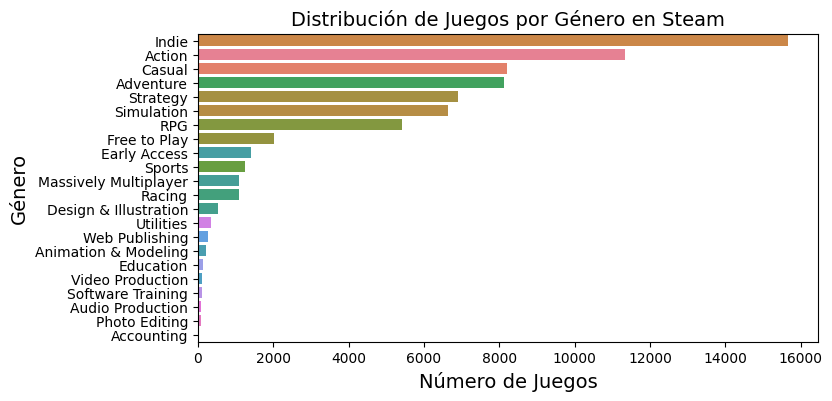

In [7]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=games, y='genres', orient='h',order=games['genres'].value_counts().index,  hue='genres' )
ax.set_title('Distribución de Juegos por Género en Steam', fontsize=14)
ax.set_xlabel('Número de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=14)
plt.show()

**Observación**

- Los géneros con mayor cantidad de juegos son: `Indie`, `Casual`, `Action` y `Adventure`
- Es necesario recordar que un juego puede tener mas de un género asociado.

#### Feature `release_year`

In [8]:
conteo_anio_lanzamiento = games["release_year"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
conteo_anio_lanzamiento.head(10)

release_year
2017    25018
2016    17738
2015    12335
2014     6361
2013     3038
2012     2127
2011     1001
2010      666
2009      486
2008      337
Name: count, dtype: int64

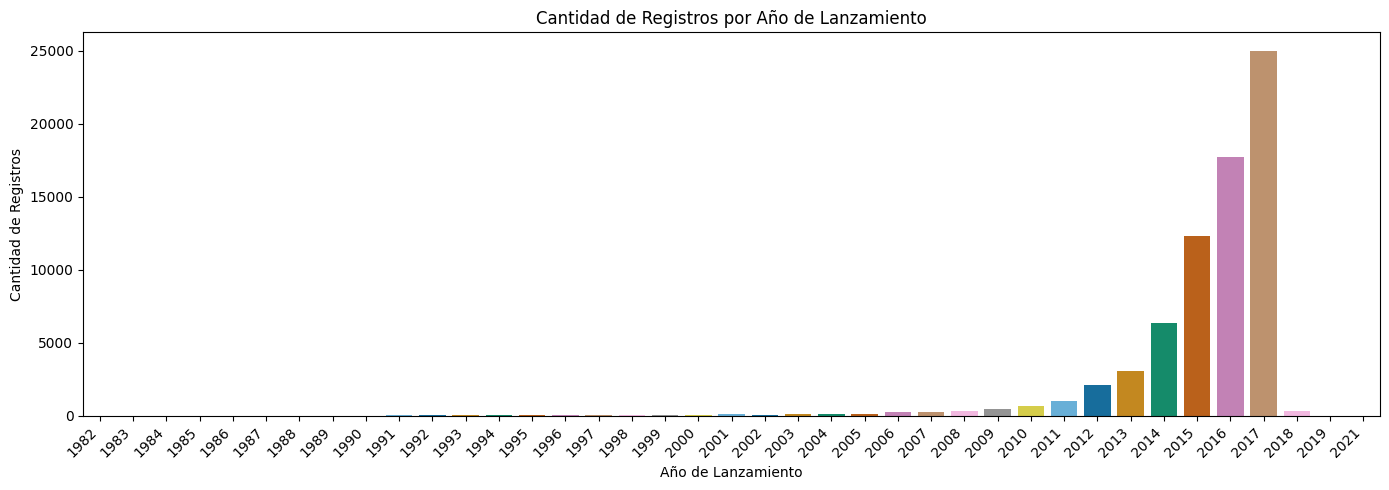

In [10]:
# Cuenta la frecuencia de cada año
conteo_anio_lanzamiento = games['release_year'].value_counts()

# Ordena los valores por año
conteo_anio_lanzamiento = conteo_anio_lanzamiento.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anio_lanzamiento.index, y=conteo_anio_lanzamiento.values, palette="colorblind")
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observación**
 
 - Aunque Steam se introdujo en 2003 como una plataforma para la actualización de juegos de Valve, no fue hasta 2007 que amplió su modelo de negocio para incluir software de terceros. Esto explica la baja cantidad de juegos desarrollados antes de 2007, presentes en su catálogo. A partir de ese año, se observa un crecimiento exponencial en la cantidad de juegos lanzados anualmente, alcanzando su punto máximo en 2017 con 25000 títulos lanzados aproximadamente.

#### Feature `developer` y `publisher`

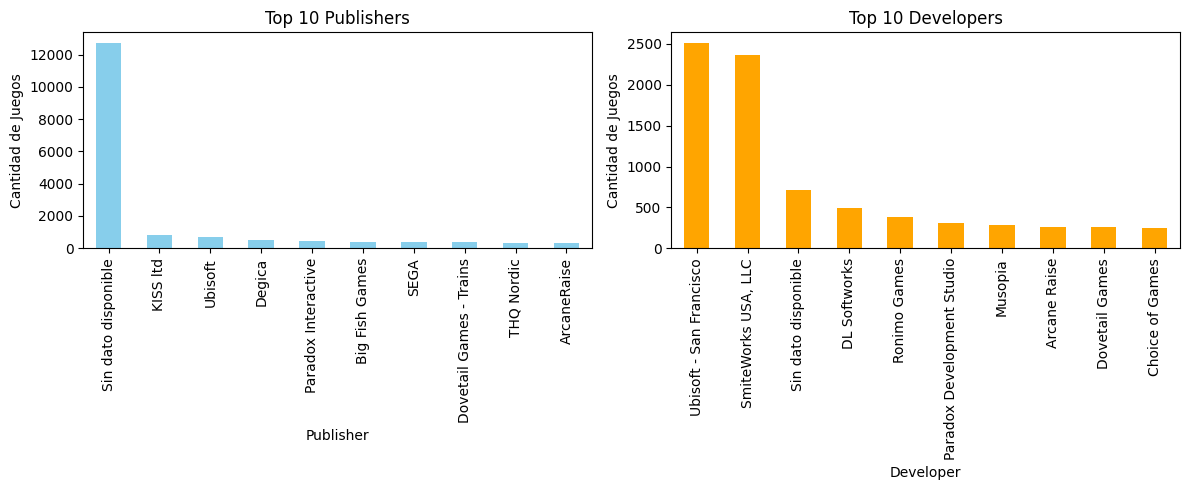

In [11]:
# Contar la cantidad de juegos por publisher
conteo_publisher = games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

**Observación**
La mayor cantidad no dispone de la información acerca del desarrollador y del publicista. En el caso de los desarrolladores, Ubisoft y SmiteWorks son los desarrolladores que mas juegos han desarrollado para la plataforma con gran diferencia al resto.

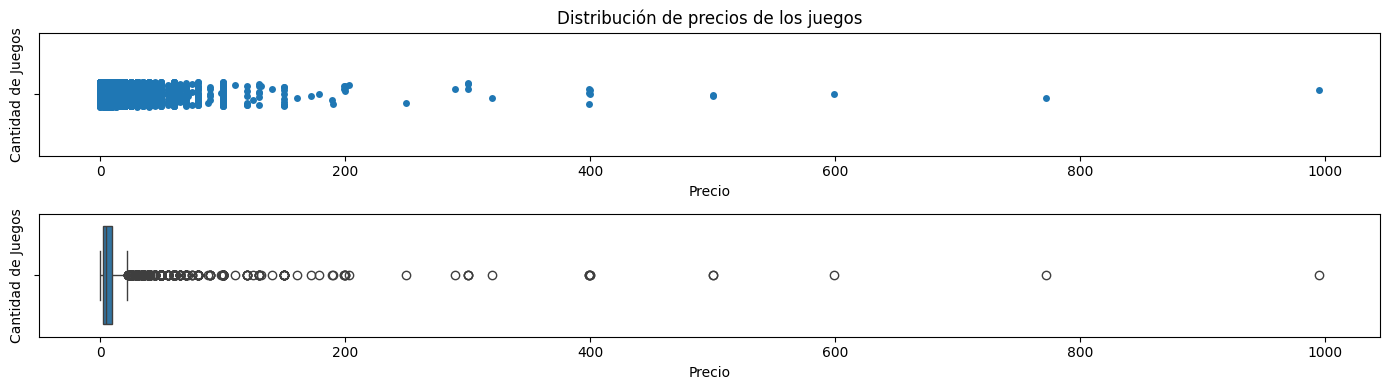

In [12]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = games.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 4))  # Cambiado para usar subplots directamente

sns.stripplot(data=df_precio_unicos, x='price', ax=ax1)  # Especifica la columna 'price' como 'x'
ax1.set_xlabel('Precio') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

sns.boxplot(data=df_precio_unicos, x='price', ax=ax2)  # Especifica la columna 'price' como 'x'
ax2.set_xlabel('Precio') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


Ahora vamos a observar algunos 

In [13]:
def estadisticos_cont(num):
    """
    Esta función describe algunas estadísticos de un conjunto de datos

    Args:
        num (df): puede ser un dataframe o una columna en específico
    """
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [14]:
estadisticos_cont(games[['price']])

,count,mean,median,std,min,25%,50%,75%,max
price,71044.0,8.539498,4.99,16.392732,0.0,1.99,4.99,9.99,995.0


Conclusión
* El precio medio (mediana) de los juegos es de: 4.99 dólares
* El precio promedio (mean) de los juegos es de: 8.53 dólares
* El 75% de los juegos tienen un precio menor de: 10 dólares

### EDA del dataset  `user_reviews`

In [15]:
reviews = pd.read_parquet("data/02-user-reviews.parquet") # Lectura del dataset
reviews.head()

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,posted_year,sentiment_analysis,release_year
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011,1,2009
1,evcentric,http://steamcommunity.com/id/evcentric,248820,No ratings yet,True,2013,2,2013
2,doctr,http://steamcommunity.com/id/doctr,250320,2 of 2 people (100%) found this review helpful,True,2013,2,2013
3,maplemage,http://steamcommunity.com/id/maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014,1,2012
4,Wackky,http://steamcommunity.com/id/Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014,0,2013


In [16]:
reviews.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48690 entries, 0 to 48689
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48690 non-null  object
 1   user_url            48690 non-null  object
 2   reviews_item_id     48690 non-null  int64 
 3   reviews_helpful     48690 non-null  object
 4   reviews_recommend   48690 non-null  bool  
 5   posted_year         48690 non-null  int64 
 6   sentiment_analysis  48690 non-null  int64 
 7   release_year        48690 non-null  int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 2.6+ MB


Se tienen 48690 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos, hay que recordar que en el ETL se observaron datos faltantes en la columna 'reviews_date' donde se rellenó con 'Formato inválido'.

In [17]:
reviews.isnull().sum() # obtenemos la cantidad de valores nulos por columna

user_id               0
user_url              0
reviews_item_id       0
reviews_helpful       0
reviews_recommend     0
posted_year           0
sentiment_analysis    0
release_year          0
dtype: int64

#### Variables categóricas

* **user_id** : identificación del usuario de plataforma
* **recommend** : valor booleano que indica si se ha realizado review
* **sentiment_analysis** : clasificación de las reviews en:
    * positivo = 2 
    * negativo = 0 
    * neutral = 1

#### Feature `user_id`

In [18]:
# contabilizamos la cantidad de usuarios de juegos Steam que hay en la plataforma 
cantidad_usuarios = len(reviews["user_id"].unique())
cantidad_usuarios

22936

**Observación**
- Hay un total de 22936 usuarios únicos en user_reviews. 

#### Feature `reviews_recommend`

In [19]:
# realizamos el conteo de cada una de las categorías de sentimientos
cantidad_sentimiento= reviews["reviews_recommend"].value_counts()
cantidad_sentimiento

reviews_recommend
True     43537
False     5153
Name: count, dtype: int64

**Observación**
- Alrededor de un 12% (5153) de los usuarios no recomiendan el juego que consumen. 

#### Feature `sentiment_analisis`

In [20]:
# realizamos el conteo de cada una de las categorías de sentimientos
cantidad_sentimiento= reviews["sentiment_analysis"].value_counts()
cantidad_sentimiento

sentiment_analysis
1    29886
2    14629
0     4175
Name: count, dtype: int64

**Observación**
- Las reviews con sentimientos positivos fueron 14629
- Las reviews con sentimientos neutrales fueron 29886
- Las reviews con sentimientos negativos fueron 4175

#### c) Tratamiento Variables numéricas

* **posted_year** : fecha en que se realiza la review

#### Feature `posted_year`

In [21]:
fecha_posteo =reviews["posted_year"].describe()
fecha_posteo

count    48690.000000
mean      2013.930376
std          1.105776
min       2010.000000
25%       2013.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: posted_year, dtype: float64

Realizamos un histograma de fechas de posteo

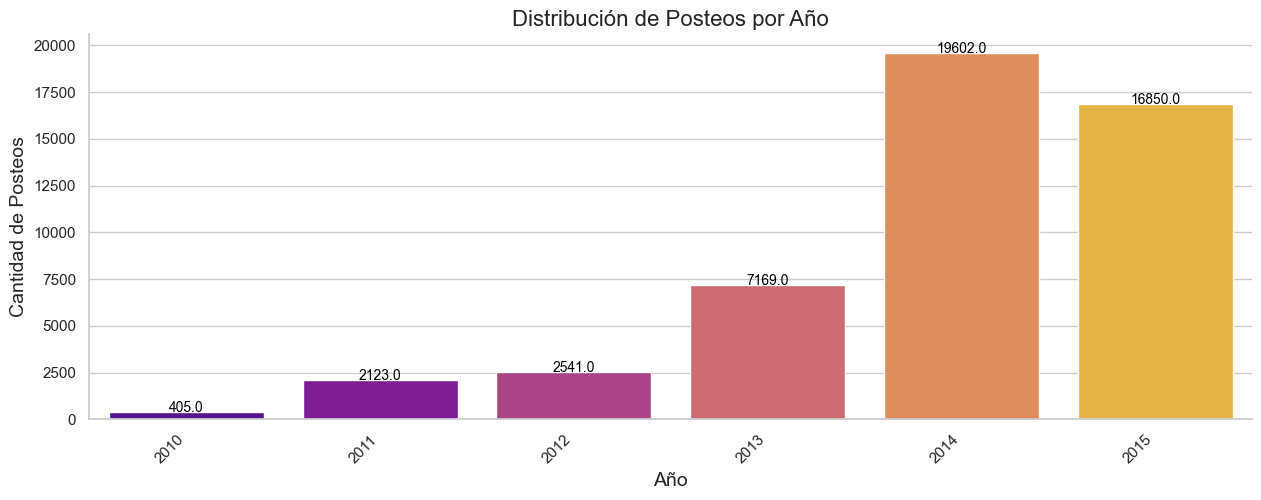

In [23]:
sns.set_theme(style="whitegrid", palette="plasma")

plt.figure(figsize=(15, 5))

ax = sns.countplot(data=reviews, x=reviews["posted_year"], palette="plasma")  # Agrega una coma aquí

ax.set_title('Distribución de Posteos por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Posteos', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

sns.despine()
plt.show()

**Observación**
- La cantidad total de posteos es de 48690.
- El año con más posts fue 2014 con 19602 

### 3- EDA de `users_items.parquet`

#### a) Extracción y revisión de nulos y duplicados

Extraemos el dataset que resulto luego del ETL

In [24]:
items = pd.read_parquet("data/03-users-items.parquet")
items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id
0,10,Counter-Strike,0.10,76561197970982479,277,76561197970982479
1,30,Day of Defeat,0.12,76561197970982479,277,76561197970982479
2,300,Day of Defeat: Source,78.88,76561197970982479,277,76561197970982479
3,240,Counter-Strike: Source,30.88,76561197970982479,277,76561197970982479
4,3830,Psychonauts,5.55,76561197970982479,277,76561197970982479


In [25]:
items.info()
print(items.shape)# Se revisan tipos de datos y existencias de nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246375 entries, 0 to 3246374
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           int64  
 1   item_name         object 
 2   playtime_forever  float64
 3   steam_id          int64  
 4   items_count       int64  
 5   user_id           object 
dtypes: float64(1), int64(3), object(2)
memory usage: 148.6+ MB
(3246375, 6)


In [26]:
items.isnull().sum() # Existencia de nulos

item_id             0
item_name           0
playtime_forever    0
steam_id            0
items_count         0
user_id             0
dtype: int64

Este conjunto de datos tiene 6 columnas y 3246375 registros. Para recordar, contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en horas) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario

#### Variables numéricas

* **items_count** : cantidad de juegos Steam que consume un usuario
* **playtime_forever** : cantidad de tiempo que juega un usuario

#### Feature `items_count`

Se observa el top 5 de usuarios y el total de juegos consumidos

In [27]:
items_count = items.groupby('user_id')['items_count'].unique().explode() # obtenemos la cantidad de juegos por usuario
items_count= pd.DataFrame(items_count) # convertimos a dataframe
items_count_user = items_count.sort_values('items_count', ascending=False) # ordenamos de mayor a menor
items_count_user.head()


,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027


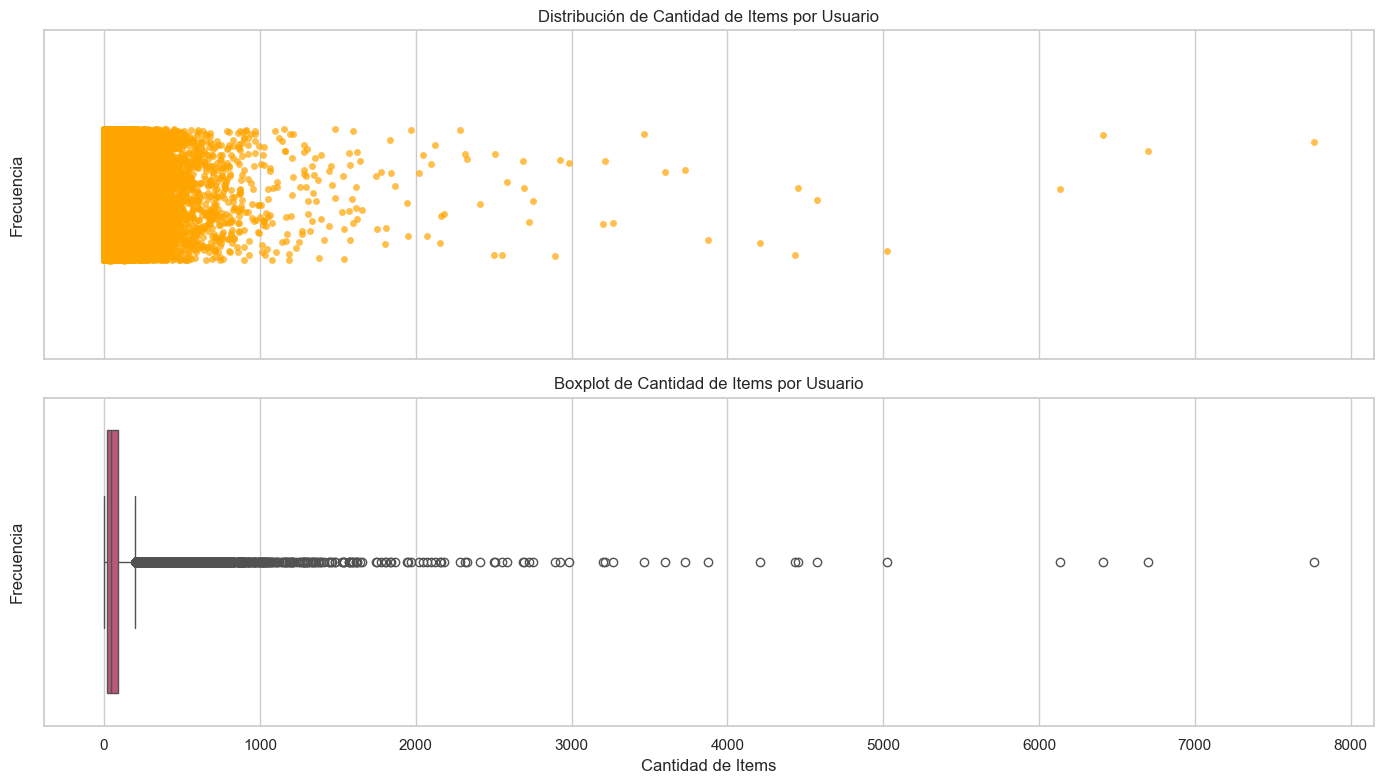

In [28]:
# Creamos un un Stripplot y un Boxplot para visualizar la distribución de la cantidad de items por usuario
sns.set_theme(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=items_count_user, x='items_count', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Items por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=items_count_user, x='items_count', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Items por Usuario')

plt.tight_layout()
plt.show()


In [29]:
items_count_user.describe()

,items_count
count,68403
unique,924
top,2
freq,1545


**Observación**
- La cantidad total artículos consumidos es de 68403. 
- El `user_id` con más cantidad de artículos consumidos es `phrostb` con 7762

#### Feature `playtime_forever`

Esta columna hacen referencia al tiempo en horas acumulados que un usuario ha jugado.

In [30]:
time_count = items.groupby('user_id')['playtime_forever'].unique().explode()  # Obtenemos el tiempo de juego por usuario
time_count = pd.DataFrame(time_count)  # Convertimos a DataFrame
time_count['playtime_forever'] = time_count['playtime_forever']
time_count_user = time_count.sort_values('playtime_forever', ascending=False)  # Ordenamos de mayor a menor
time_count_user.head(5)

,playtime_forever
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13


Top 5 de usuarios con mayor número de horas de juego

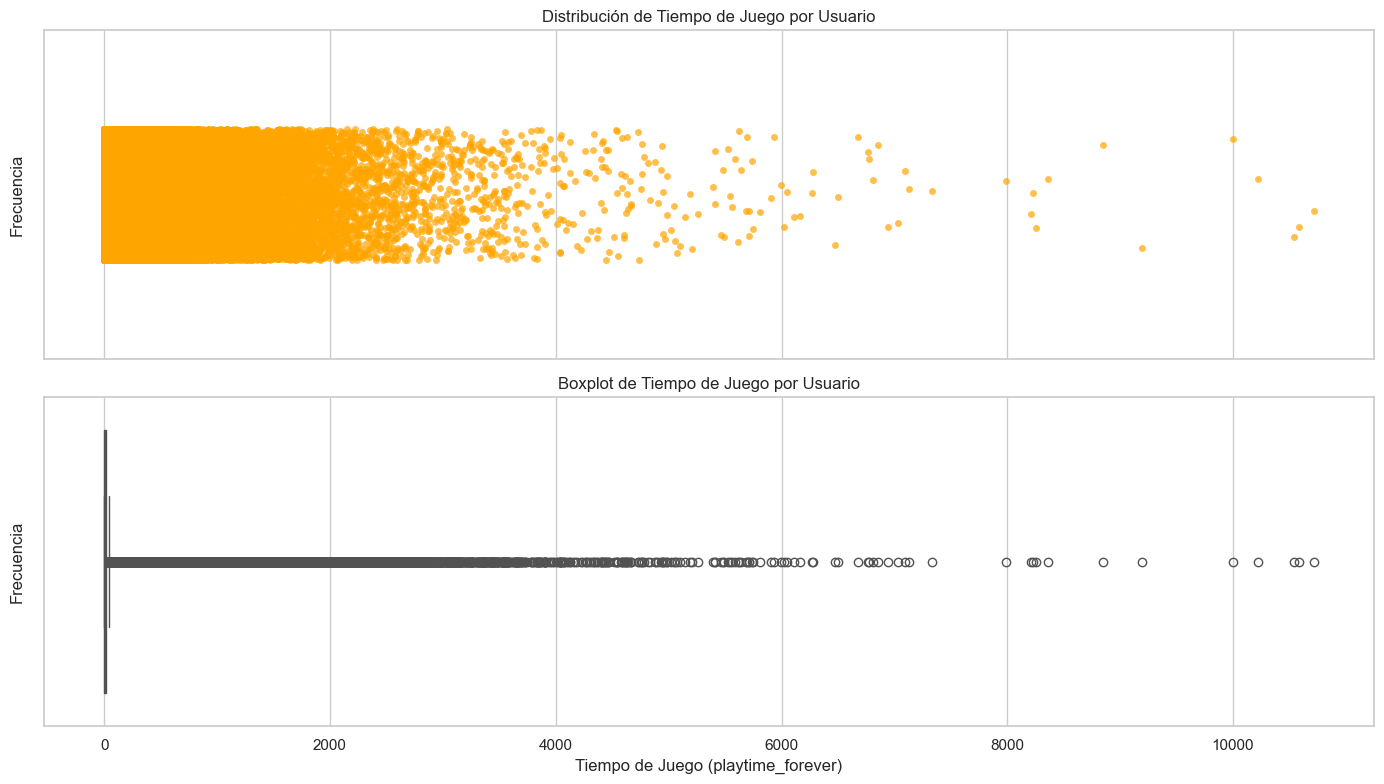

In [31]:
# Confeccionamos un Stripplot y un Boxplot para visualizar la distribución del tiempo de juego por usuario
sns.set_theme(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=time_count_user, x='playtime_forever', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Tiempo de Juego (playtime_forever)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Tiempo de Juego por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=time_count_user, x='playtime_forever', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Tiempo de Juego (playtime_forever)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Tiempo de Juego por Usuario')

plt.tight_layout()
plt.show()

In [32]:
items_count_user['items_count'].astype(float).describe()

count    68403.000000
mean        74.407161
std        134.075659
min          1.000000
25%         16.000000
50%         42.000000
75%         90.000000
max       7762.000000
Name: items_count, dtype: float64

Conclusiones:
* El tiempo promedio (mean) de juego por usuario es de: 74 horas
* El 75% de los usuarios han jugado más 90 horas a un juego en Steam
* La mitad de usuarios ha jugado al menos 40 horas

**Observación**
- El `user_id` con más cantidad de tiempo consumido en juegos Steam es `wolop` con 10712 horas

## Preparamos los dataset para las funciones de los endpoints y el modelo de recomendación

Para el modelo de recomendación se busca como resultado la recomendación un una lista de 5 juegos a partir de indicar el nombre de un juego o el id de un usuario, basado en un puntaje que se debe decidir cómo crearlo. Para ello, se revisan los dataframe `reviews` e `items` analizados anteriormente.

In [33]:
reviews = pd.read_parquet("data/02-user-reviews.parquet")
items = pd.read_parquet('data/03-users-items.parquet')

In [34]:
reviews.head()

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,posted_year,sentiment_analysis,release_year
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011,1,2009
1,evcentric,http://steamcommunity.com/id/evcentric,248820,No ratings yet,True,2013,2,2013
2,doctr,http://steamcommunity.com/id/doctr,250320,2 of 2 people (100%) found this review helpful,True,2013,2,2013
3,maplemage,http://steamcommunity.com/id/maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014,1,2012
4,Wackky,http://steamcommunity.com/id/Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014,0,2013


In [35]:
items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id
0,10,Counter-Strike,0.10,76561197970982479,277,76561197970982479
1,30,Day of Defeat,0.12,76561197970982479,277,76561197970982479
2,300,Day of Defeat: Source,78.88,76561197970982479,277,76561197970982479
3,240,Counter-Strike: Source,30.88,76561197970982479,277,76561197970982479
4,3830,Psychonauts,5.55,76561197970982479,277,76561197970982479


Con los datos disponible, se decide crear un puntaje (rating) para los juegos a partir de considerar el análisis de sentimiento de las reviews para cada juego y las recomendaciones del usuario para ese juego. Recordar que el análisis de sentimiento esta calificado como 0 (sentimiento negativo), 1 (sentimiento neutral) y 2 (sentimiento positivo) y las recomendaciones al juego son True (cuando lo recomienda) y False (cuando no recomienda el juego). Con esta información se busca hacer un puntaje del 1 al 5, siendo el 1 un juego no recomendado que cuentan con reviews con sentimientos negativos y 5 un juego recomendado y con reviews positivos. Se considera esta escala en función de la combinación de las dos variables de esta manera:

* **1** si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
* **2** si el análisis de sentimiento es neutral y no es recomendado (False)
* **3** si el análisis de sentimiento es neutral pero es recomendado (True)
* **4** si el análisis de sentimiento es positivo y no es recomendado (False)
* **5** si el análisis de sentimiento es positivo y es recomendado (True)

Con esto, se arma la siguiente función:

In [36]:
def calcula_rating(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "reviews_recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    sentiment = row["sentiment_analysis"]
    recommend = row["reviews_recommend"]

    if sentiment in {0, 1, 2} and recommend in {True, False}:
        return min(sentiment + 1 + int(recommend), 5)
    else:
        return None

Se aplica esta función en una nueva columna sobre el dataframe `df_reviews`

In [37]:
reviews['rating'] = reviews.apply(calcula_rating, axis=1)
reviews.head()

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,posted_year,sentiment_analysis,release_year,rating
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011,1,2009,3
1,evcentric,http://steamcommunity.com/id/evcentric,248820,No ratings yet,True,2013,2,2013,4
2,doctr,http://steamcommunity.com/id/doctr,250320,2 of 2 people (100%) found this review helpful,True,2013,2,2013,4
3,maplemage,http://steamcommunity.com/id/maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014,1,2012,3
4,Wackky,http://steamcommunity.com/id/Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014,0,2013,2


Se crea un nuevo dataframe dejando solo las columnas 'user_id', 'reviews_item_id' y 'rating' y se reserva. Esto para posteriormente obtener un dataset individual para el modelo de recomendación

In [38]:
df1 = reviews[['user_id', 'reviews_item_id', 'rating']]
df1.head()

,user_id,reviews_item_id,rating
0,76561197970982479,1250,3
1,evcentric,248820,4
2,doctr,250320,4
3,maplemage,211420,3
4,Wackky,249130,2


Se crea otro dataframe que contenga unicamente los 'item_id' y los nombres de los juego.

In [39]:
df2 = items[['item_id', 'item_name']]
# Se borran los duplicados
df2 = df2.drop_duplicates()

print(df2.shape) # Tamaño
df2.head()


(10050, 2)


,item_id,item_name
0,10,Counter-Strike
1,30,Day of Defeat
2,300,Day of Defeat: Source
3,240,Counter-Strike: Source
4,3830,Psychonauts


Luego se agregan los nombres de los juegos al primer dataframe.

In [40]:
df_unido = df1.merge(df2, left_on="reviews_item_id", right_on="item_id", how='left')
df_unido

,user_id,reviews_item_id,rating,item_id,item_name
0,76561197970982479,1250,3,1250.0,Killing Floor
1,evcentric,248820,4,248820.0,Risk of Rain
2,doctr,250320,4,250320.0,The Wolf Among Us
3,maplemage,211420,3,211420.0,Dark Souls: Prepare to Die Edition
4,Wackky,249130,2,249130.0,LEGO® MARVEL Super Heroes
...,...,...,...,...,...
48685,kushikushigani,332310,3,332310.0,LEGO® Worlds
48686,How51,440,3,NaN,NaN
48687,76561198111410893,304930,3,304930.0,Unturned
48688,zaza147,265630,4,265630.0,Fistful of Frags


In [41]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48690 entries, 0 to 48689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          48690 non-null  object 
 1   reviews_item_id  48690 non-null  int64  
 2   rating           48690 non-null  int64  
 3   item_id          44092 non-null  float64
 4   item_name        44092 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ MB


In [42]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df_unido[df_unido.isnull().any(axis=1)]

# Se calculan la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['reviews_item_id'].unique())} juegos con reviews pero que no están en el dataset de items")
sin_juegos.head()

Hay un total de 257 juegos con reviews pero que no están en el dataset de items


,user_id,reviews_item_id,rating,item_id,item_name
8,76561198077246154,440,3,NaN,NaN
16,devvonst,440,4,NaN,NaN
29,boydeer,440,3,NaN,NaN
34,jarrodtrim,440,4,NaN,NaN
36,76561198067936203,440,3,NaN,NaN


Dado que se hará una recomendación basados en el rating de las reviews a través de la búsqueda por su id y name, se decide borrarlos del conjunto de datos

In [43]:
# Se borran los nulos
df_unido = df_unido.dropna(subset=['item_id'])

df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44092 entries, 0 to 48689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          44092 non-null  object 
 1   reviews_item_id  44092 non-null  int64  
 2   rating           44092 non-null  int64  
 3   item_id          44092 non-null  float64
 4   item_name        44092 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [44]:
df_unido.shape # Tamaño

(44092, 5)

Se obtiene un dataset solo con la información relevante para el modelo de recomendación

In [45]:
df_modelo = df_unido[['user_id', 'item_name', 'rating']]
df_modelo.head(5)

,user_id,item_name,rating
0,76561197970982479,Killing Floor,3
1,evcentric,Risk of Rain,4
2,doctr,The Wolf Among Us,4
3,maplemage,Dark Souls: Prepare to Die Edition,3
4,Wackky,LEGO® MARVEL Super Heroes,2


En el siguiente gráfico se muestra la cantidad de reviews clasificadas por rating luego del procesamiento (ETL-EDA) de los datos 

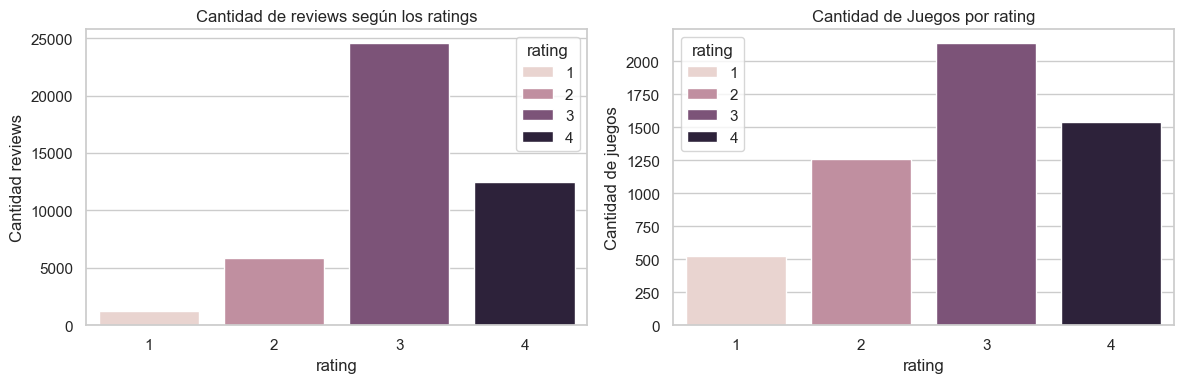

In [46]:
# Agrupa las calificaciones por rating
ratings_count = df_modelo['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Agrupa los juegos únicos por rating
unique_games_per_rating = df_modelo.groupby('rating')['item_name'].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0], hue= 'rating')
axes[0].set_title('Cantidad de reviews según los ratings') ; axes[0].set_ylabel('Cantidad reviews')

# Segundo subplot
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1], hue= 'rating')
axes[1].set_title('Cantidad de Juegos por rating') ; axes[1].set_ylabel('Cantidad de juegos')

# Ajusta y muestra los gráficos
plt.tight_layout()
plt.show()

In [47]:
unique_games_per_rating

,rating,item_name
0,1,527
1,2,1263
2,3,2136
3,4,1543


Conclusión:

Se observa que la mayoría de juegos presentan un rating favorable, tal como había estimado el modelo de recomendación, también para el rating 3 se presenta el mayor número de reviews

Se guarda el dataset para utilizar en el modelo de recomendación, también como .parquet para optimizar peso del archivo

In [48]:
df_modelo.to_csv('data/10-modelo-recomend.csv', index=False, encoding='utf-8')

In [49]:
modelo_recomend = pd.read_csv("data/10-modelo-recomend.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(modelo_recomend) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"data/10-modelo-recomend.parquet") # exportamos la tabla a parquet